In [3]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

Importing data

In [38]:
data = pd.read_csv('london_houses.csv')

In [39]:
data.head()

,Address,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,Heating Type,Balcony,Interior Style,View,Materials,Building Status,Price (£)
0,78 Regent Street,Notting Hill,2,3,179,72,No,No,3,Semi-Detached,Electric Heating,High-level Balcony,Industrial,Garden,Marble,Renovated,2291200
1,198 Oxford Street,Westminster,2,1,123,34,Yes,No,1,Apartment,Central Heating,High-level Balcony,Industrial,City,Laminate Flooring,Old,1476000
2,18 Regent Street,Soho,5,3,168,38,No,Yes,3,Semi-Detached,Central Heating,No Balcony,Industrial,Street,Wood,Renovated,1881600
3,39 Piccadilly Circus,Islington,5,1,237,53,Yes,Yes,1,Apartment,Underfloor Heating,No Balcony,Classic,Park,Granite,Renovated,1896000
4,116 Fleet Street,Marylebone,4,1,127,23,No,Yes,2,Semi-Detached,Central Heating,No Balcony,Modern,Park,Wood,Old,1524000


In [40]:
data.describe()

,Bedrooms,Bathrooms,Square Meters,Building Age,Floors,Price (£)
count,1000.000000,1000.000000,1000.0000,1000.00000,1000.000000,1.000000e+03
mean,3.013000,2.003000,149.6270,49.96500,1.991000,1.840807e+06
std,1.393834,0.808483,58.0562,29.07086,0.821946,8.793484e+05
min,1.000000,1.000000,50.0000,1.00000,1.000000,3.866660e+05
25%,2.000000,1.000000,99.0000,24.00000,1.000000,1.161400e+06
50%,3.000000,2.000000,148.0000,50.00000,2.000000,1.721999e+06
75%,4.000000,3.000000,201.0000,76.00000,3.000000,2.390500e+06
max,5.000000,3.000000,249.0000,99.00000,3.000000,4.980000e+06


In [41]:
data.replace({
    'Neighborhood':{'Camden': 0, 'Chelsea': 1, 'Greenwich': 2, 'Islington': 3, 'Kensington': 4, 'Marylebone': 5, 'Notting Hill': 6, 'Shoreditch': 7, 'Soho': 8, 'Westminster': 9},
    'Garden': {'No': 0, 'Yes': 1},
    'Garage': {'No': 0, 'Yes': 1},
    'Property Type': {'Apartment': 0, 'Detached House': 1, 'Semi-Detached': 2},
    'Heating Type': {'Gas Heating': 0, 'Electric Heating': 1, 'Central Heating': 2, 'Underfloor Heating': 3},
    'Balcony': {'High-level Balcony': 0, 'Low-level Balcony': 1, 'No Balcony': 2},
    'Interior Style': {'Industrial': 0, 'Classic': 1, 'Minimalist': 2, 'Modern': 3},
    'View': {'Garden': 0, 'City': 1, 'Street': 2, 'Park': 3, 'Sea': 4},
    'Materials': {'Marble': 0, 'Laminate Flooring': 1, 'Wood': 2, 'Granite': 3, 'Glass': 4},
    'Building Status': {'Renovated': 0, 'Old': 1, 'New': 2}
}, inplace=True)


C:\Users\thaku\AppData\Local\Temp\ipykernel_22032\2162200602.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({


In [42]:
data.head()

,Address,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,Heating Type,Balcony,Interior Style,View,Materials,Building Status,Price (£)
0,78 Regent Street,6,2,3,179,72,0,0,3,2,1,0,0,0,0,0,2291200
1,198 Oxford Street,9,2,1,123,34,1,0,1,0,2,0,0,1,1,1,1476000
2,18 Regent Street,8,5,3,168,38,0,1,3,2,2,2,0,2,2,0,1881600
3,39 Piccadilly Circus,3,5,1,237,53,1,1,1,0,3,2,1,3,3,0,1896000
4,116 Fleet Street,5,4,1,127,23,0,1,2,2,2,2,3,3,2,1,1524000


In [50]:
X = data[['Neighborhood','Bedrooms', 'Bathrooms', 'Square Meters', 'Building Age', 'Garden', 'Garage', 'Floors', 'Property Type', 'Heating Type',	'Balcony', 'Interior Style', 'View','Materials', 'Building Status']]
y = data['Price (£)']

In [51]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [52]:
model = SVR(kernel='linear')

In [53]:
model.fit(x_train, y_train)

SVR(kernel='linear')

In [54]:
y_pred = model.predict(x_test)

In [58]:
custom_data = np.array([[6,3, 2, 234, 5, 1, 1, 2, 0, 2, 1, 3, 1, 2, 2]])
print(model.predict(custom_data))

[2475661.7919198]


c:\Users\thaku\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


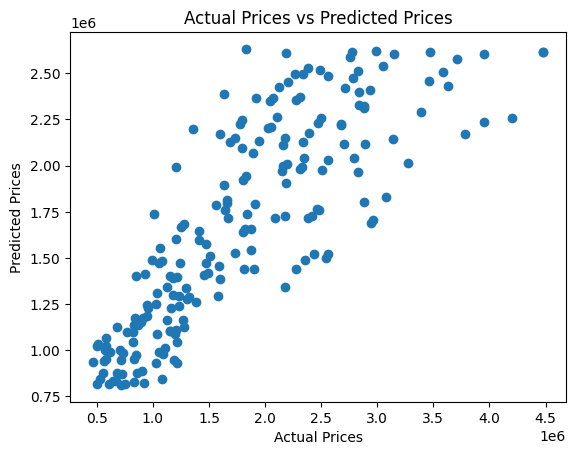

In [59]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

In [33]:
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)
R2_score = r2_score(y_test, y_pred)
print('R2 Score:', R2_score)

Mean Squared Error: 297811438454.0396
R2 Score: 0.6281216702356724
